In [44]:
import numpy as np
from lattice_class import *
from hamiltonian_constructor_class import *
import scipy.linalg
import matplotlib.pyplot as plt

plt.rcParams["figure.dpi"] = 150
plt.rcParams["savefig.dpi"] = 150

[]


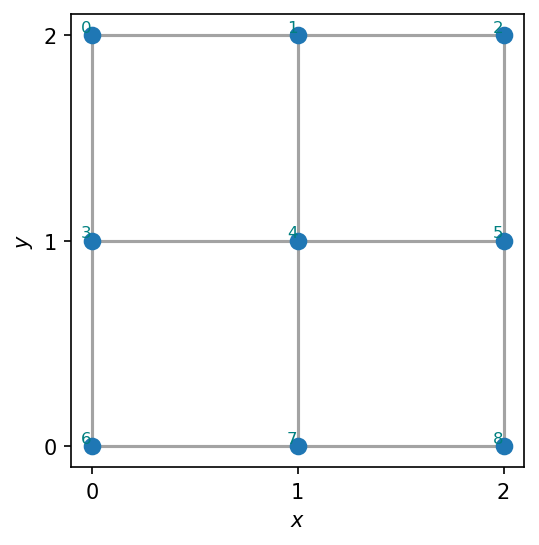

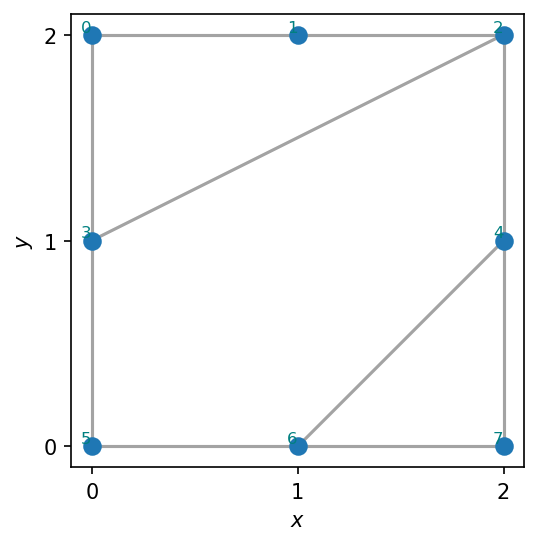

In [45]:
N_hole = 1
N = 3 * N_hole
lattice = SquareLattice(N, BC="open")
middle_sites = [(N-N_hole)//2 * N + (N-N_hole)//2 + i*N + j for i in range(N_hole) for j in range(N_hole)]

lattice.plot(True)
print([2*N_hole * N + N_hole - (i+1) * N for i in range(N_hole-1)])

lattice.glue_bond([2 * N_hole * N + N_hole + i for i in range(N_hole)], [N_hole * N + 2 * N_hole + i * N for i in range(N_hole)], (0, 2), codim=1)
lattice.glue_bond([2* N_hole * N + N_hole - 1 - (i+1) * N for i in range(N_hole-1)], [N_hole * N + 2 * N_hole - (i+1) * N for i in range(N_hole-1)], (1, 3), codim=1)
lattice.glue_bond([N_hole*N + N_hole-1], [2*N_hole], (1, 3), codim=1)
lattice.glue_bond([(N_hole-1)*N + N_hole], [2*N_hole], (2, 0), codim=1)
lattice.glue_bond([(N_hole-1) * N + N_hole + i + 1 for i in range(N_hole-1)] ,[2*N_hole + i + 1 for i in range(N_hole-1)], (2, 0), codim=1)

lattice.remove_sites(middle_sites)
lattice.remove_bonds([(2*N_hole-1 + i*N, 2*N_hole + i*N) for i in range(N_hole)])

# lattice.move_sites([i*N +j for i in range(N//3) for j in range(2*N//3 + 1)], (0.0, +3.0))
# lattice.move_sites([7, 8, 9, 17, 18, 19, 27, 28, 29], (-3.0, -0.5))
# lattice.move_sites([34, 35, 36, 41, 42, 43], (-1.5, -0.25))

num_sites = lattice.get_num_sites()
lattice_sites = lattice.get_sites()

lattice.plot(True)

In [46]:
# print(lattice.get_local_bond_index(14, 153))

flagged_bonds_triangle =  [(4, 6)]
[]
Lowest found energy:  0.2711539108391695
Index of lowest absolute energy:  16


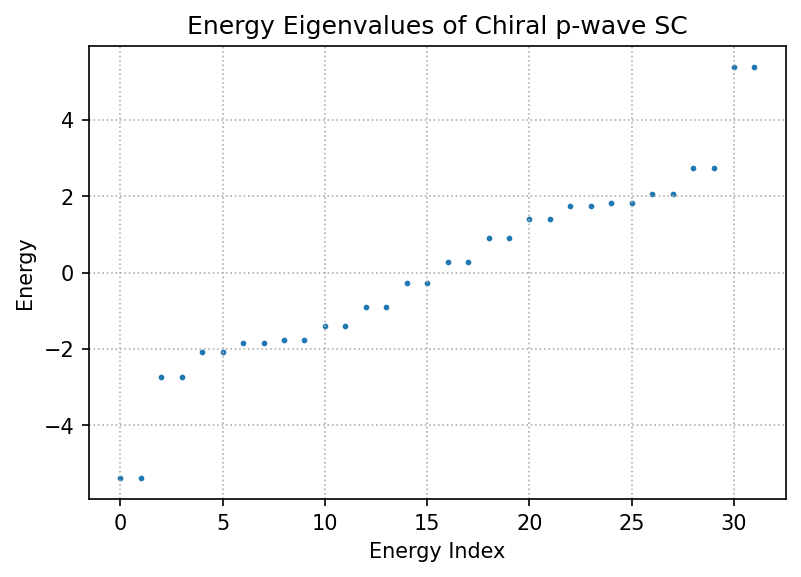

In [47]:
mu = 1.0
delta = complex(1.0, 0.0)
t = 1

n = 1
hop_phase_triangle = np.exp(n*np.pi/2)
hop_phase_pentagon = hop_phase_triangle.conjugate()
flagged_bonds_triangle = [(N_hole*N + N_hole + 2*N_hole*i, N_hole * N + N_hole * (2*N_hole) + N_hole +i) for i in range(N_hole)]
flagged_bonds_pentagon = []
print("flagged_bonds_triangle = ", flagged_bonds_triangle)

# flagged_bonds_pentagon = [(34, 27), (35, 28), (36, 29)]
# flagged_bonds_pentagon = [(27, 47), (17, 40), (7, 33), (24, 23), (14, 13), (4, 3)]

# flagged_bonds_pentagon = [(27, 47), (17, 40), (7, 33), (24, 23), (14, 13), (4, 3), (57, 48), (56, 41), (55, 34)]

Ham_constructor = HamiltonianConstructor(mu-4*t, t, t, delta)
H_direct_lattice = Ham_constructor.construct_direct_lattice_hamiltonian(lattice)
block_indices = Ham_constructor.get_block_indices(lattice.get_num_sites())

for flagged_bond in flagged_bonds_triangle:
    Ham_constructor.add_phase(H_direct_lattice, flagged_bond, hop_phase_triangle, num_sites)

for flagged_bond in flagged_bonds_pentagon:
    Ham_constructor.add_phase(H_direct_lattice, flagged_bond, hop_phase_pentagon, num_sites)

energies, states = scipy.linalg.eigh(H_direct_lattice)

tol = 0.05
low_energy_indices = np.argwhere(np.abs(energies) < tol)[:, 0]
print(low_energy_indices)

print("Lowest found energy: ", np.min(np.abs(energies)))
gs_idx = np.argmin(np.abs(energies))
print("Index of lowest absolute energy: ", gs_idx)

plt.xlabel("Energy Index")
plt.ylabel("Energy")
plt.grid(linestyle=":")
plt.title("Energy Eigenvalues of Chiral p-wave SC")
plt.scatter(range(len(energies)), energies, s=3)

idx = 16 with energy 0.2711539108391695


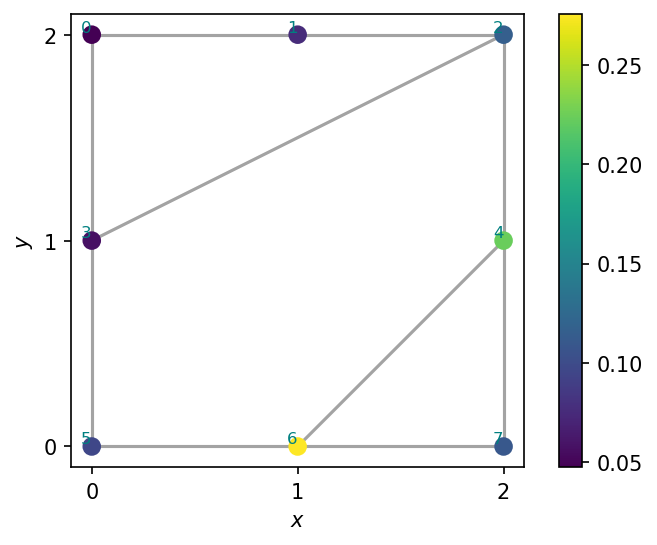

In [48]:
for gs_idx in range(gs_idx, gs_idx + 1):
    print(f"idx = {gs_idx} with energy {energies[gs_idx]}")
    gs_wave_function = states[:, gs_idx]
    gs_probabilities_nambu = np.square(np.abs(gs_wave_function))
    gs_probabilities = np.zeros(shape=(num_sites, 1))

    for site_idx in range(num_sites):
        gs_probabilities[site_idx] = np.sum(
            gs_probabilities_nambu[block_indices[site_idx]]
        )

    x_values = [k[0] for k in lattice_sites]
    y_values = [k[1] for k in lattice_sites]

    color_map = plt.get_cmap("viridis")
    sc = lattice.plot(True, c=(gs_probabilities), cmap=color_map)
    plt.colorbar(sc)
    plt.show()

In [49]:
print(lattice.get_bonds())
print(lattice.get_local_bond_indices())

[[1, 3], [0, 2], [4, 3, 1], [0, 5, 2], [2, 7, 6], [3, 6], [5, 7, 4], [4, 6]]
[[1, 2], [3, 2], [2, 3, 0], [0, 2, 1], [0, 2, 2], [0, 1], [3, 1, 0], [0, 3]]
